In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="5" color="red" >ch12_데이터 시각화</font></b>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
    * seaborn : matplot 기반으로 다양한 색상, 테마, 차트 기능과 groupby 기능 포함된 라이브러리
# 1절 matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/index

In [1]:
import matplotlib
matplotlib.__version__

'3.7.0'

## 1.1 패키지 import 및 기본 설정

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%config InlineBackend.figure_format = 'retina'
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes',unicode_minus=False) # 축의 - 깨짐 방지
# plt.rcParams['font.family'] = 'Malgun Gothic'

 
# warning(경고) 안보이게

## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1. 데이터 준비
    2. 그래프 생성
    3. 그래프 함수로 그리기
    4. 그래프 커스터마이징
    5. 그래프 출력 및 저장

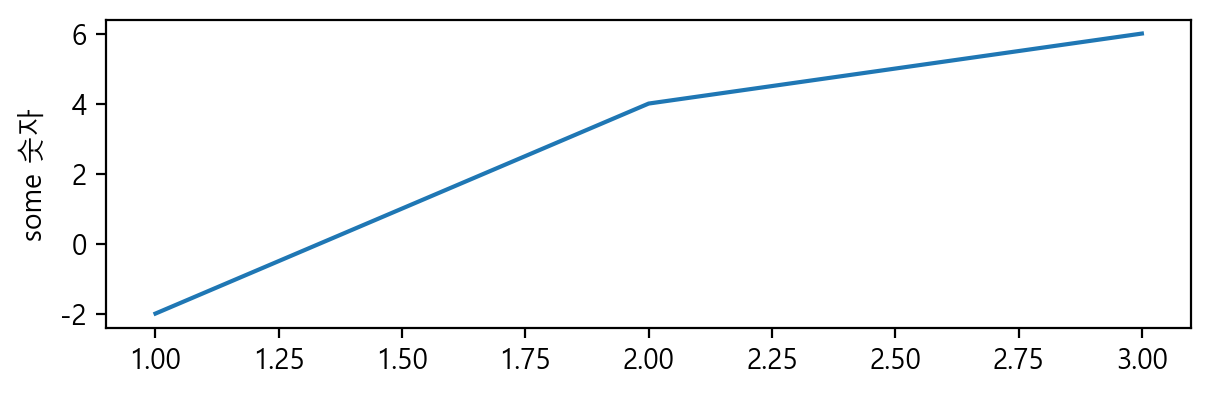

In [16]:
x = [1, 2, 3] # 1) 데이터 준비
y = [-2, 4, 6]
plt.figure(figsize=(7,2)) # 2) 그래프 객체 생성
plt.plot(x,y) # 3) 그래프 함수
plt.ylabel('some 숫자') # 4) 커스터 마이징
plt.show() # 5) 그래프 화면 출력 cf)plt.savefig('파일명.jpg')

## 1.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가

In [3]:
import numpy as np
x = np.arange(0,10,0.01)
len(x)

1000

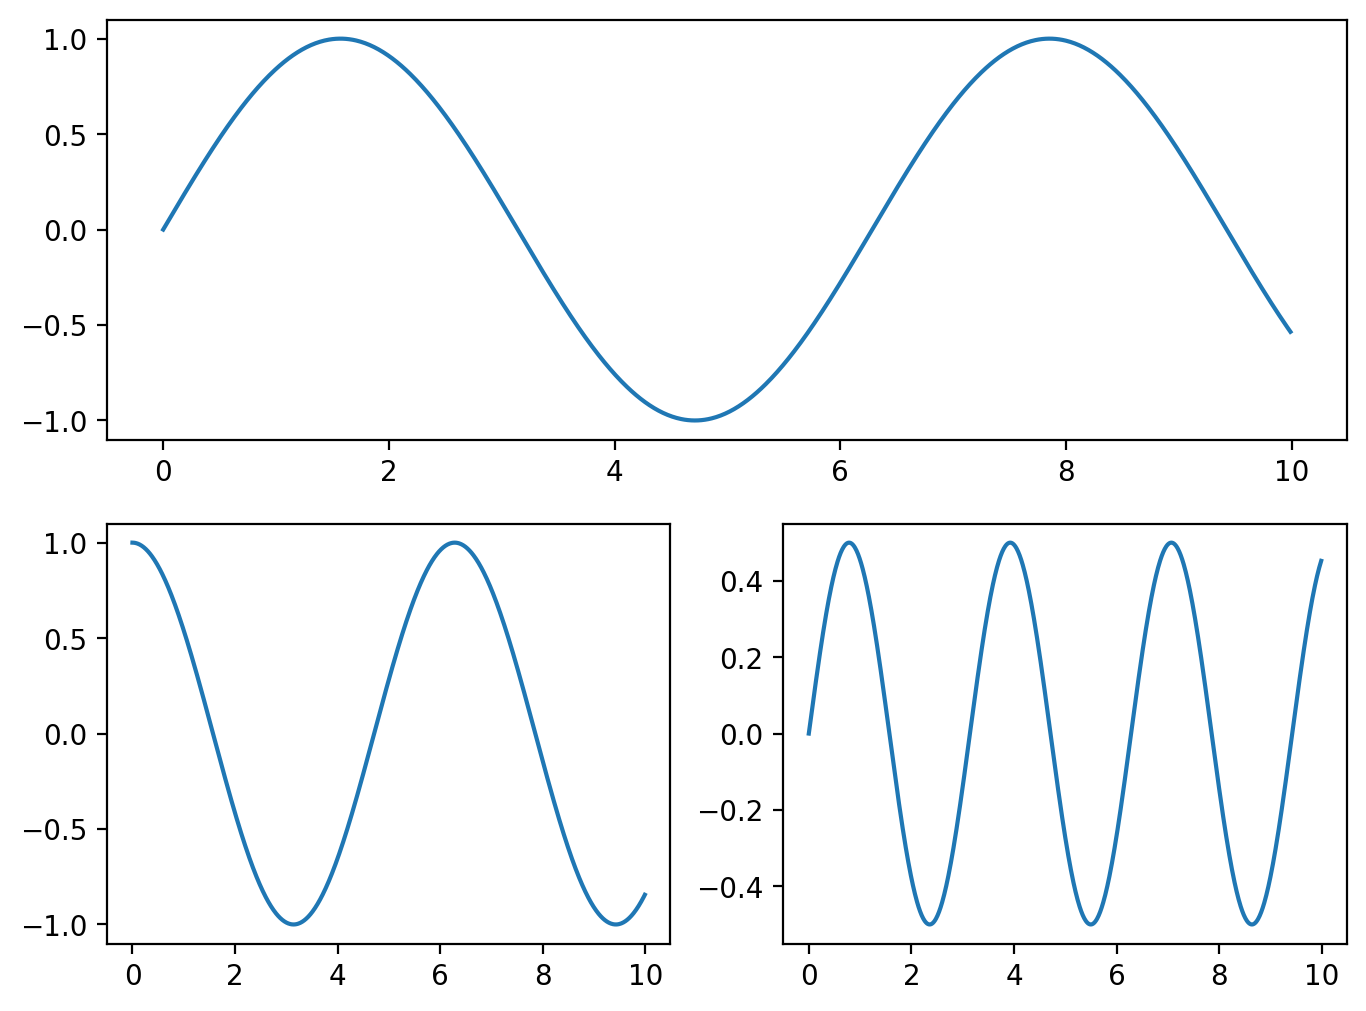

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1); plt.plot(x, np.sin(x))
plt.subplot(2,2,3); plt.plot(x, np.cos(x))
plt.subplot(224); plt.plot(x, np.sin(x)*np.cos(x))

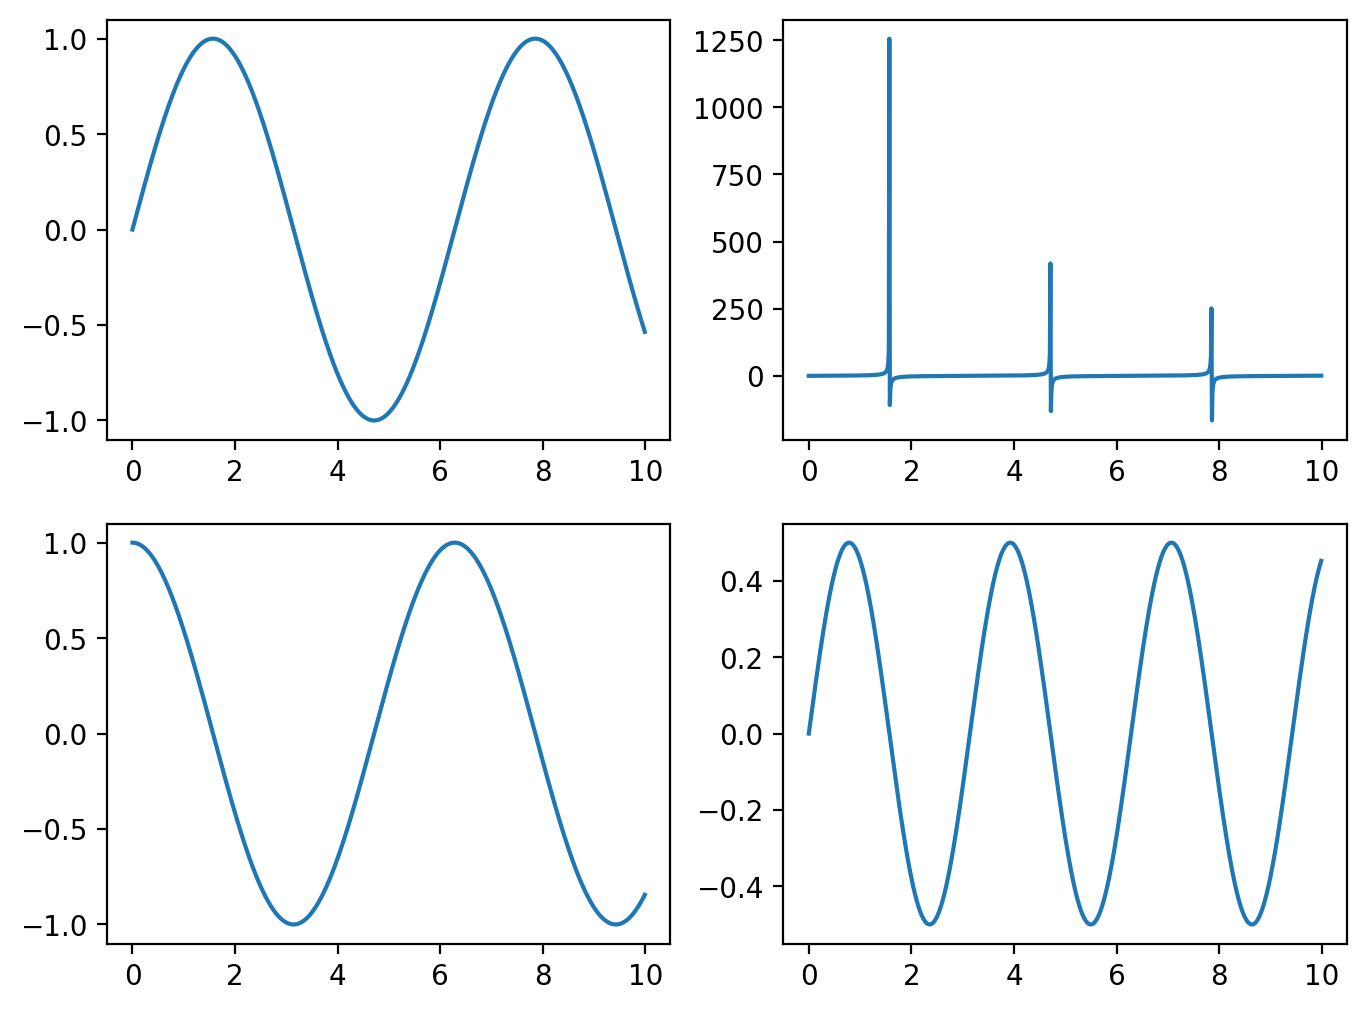

In [19]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1); plt.plot(x, np.sin(x))
plt.subplot(2,2,2); plt.plot(x, np.tan(x))
plt.subplot(2,2,3); plt.plot(x, np.cos(x))
plt.subplot(224); plt.plot(x, np.sin(x)*np.cos(x))

### 2) subplots() 함수로 서브플롯 추가
- 교안 14p ) https://wikidocs.net/92085

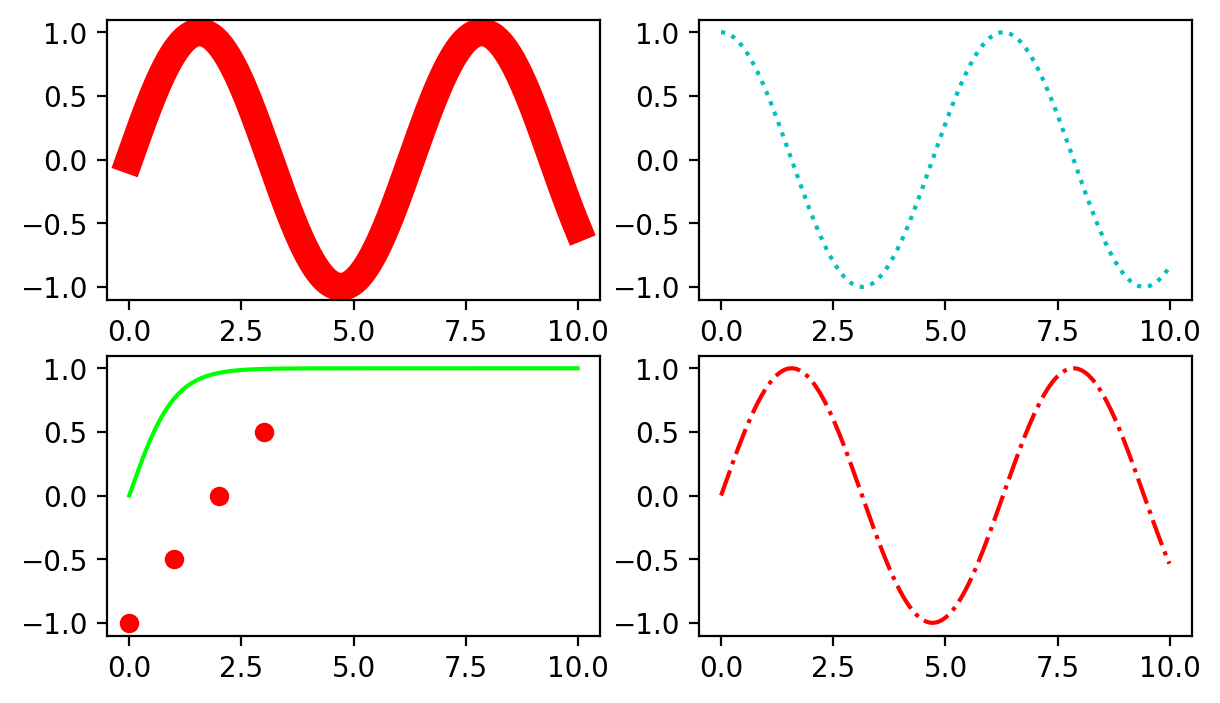

In [32]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 4))
axes[0,0].plot(x, np.sin(x), 'r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c:') # color='c', linestyle=':','--','-'
axes[1,0].plot([0,1,2,3],[-1, -0.5, 0, 0.5], 'ro') # color='r', marker='o'
axes[1,0].plot(x, np.tanh(x), '#00FF00')
axes[1,1].plot(x, np.sin(x), 'r-.')
plt.show()

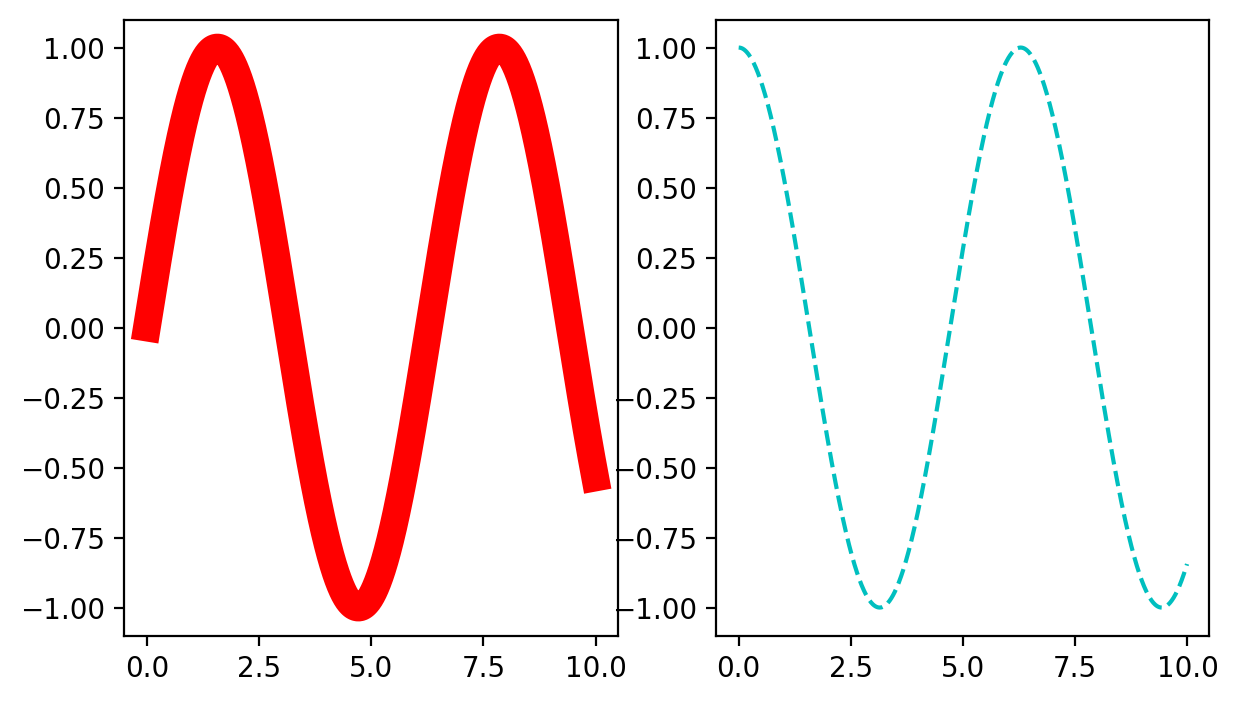

In [33]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))
axes[0].plot(x, np.sin(x), 'r', linewidth=10)
axes[1].plot(x, np.cos(x), 'c--') # color='c', linestyle=':','--','-'


### 3) pandas.DataFrame.plot()
- plt.plot(x, y, fmt)
- df.plot(x=열이름, y=열이름, kind='line', figsize, title, xlim, ylim...)
    * kind : line(기본값), scatter(점도표), bar, barh, box, pie, density,...
    * xlim, ylim : list/tuple

In [4]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
46,5.1,3.8,1.6,0.2,setosa


범례사용 https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot:

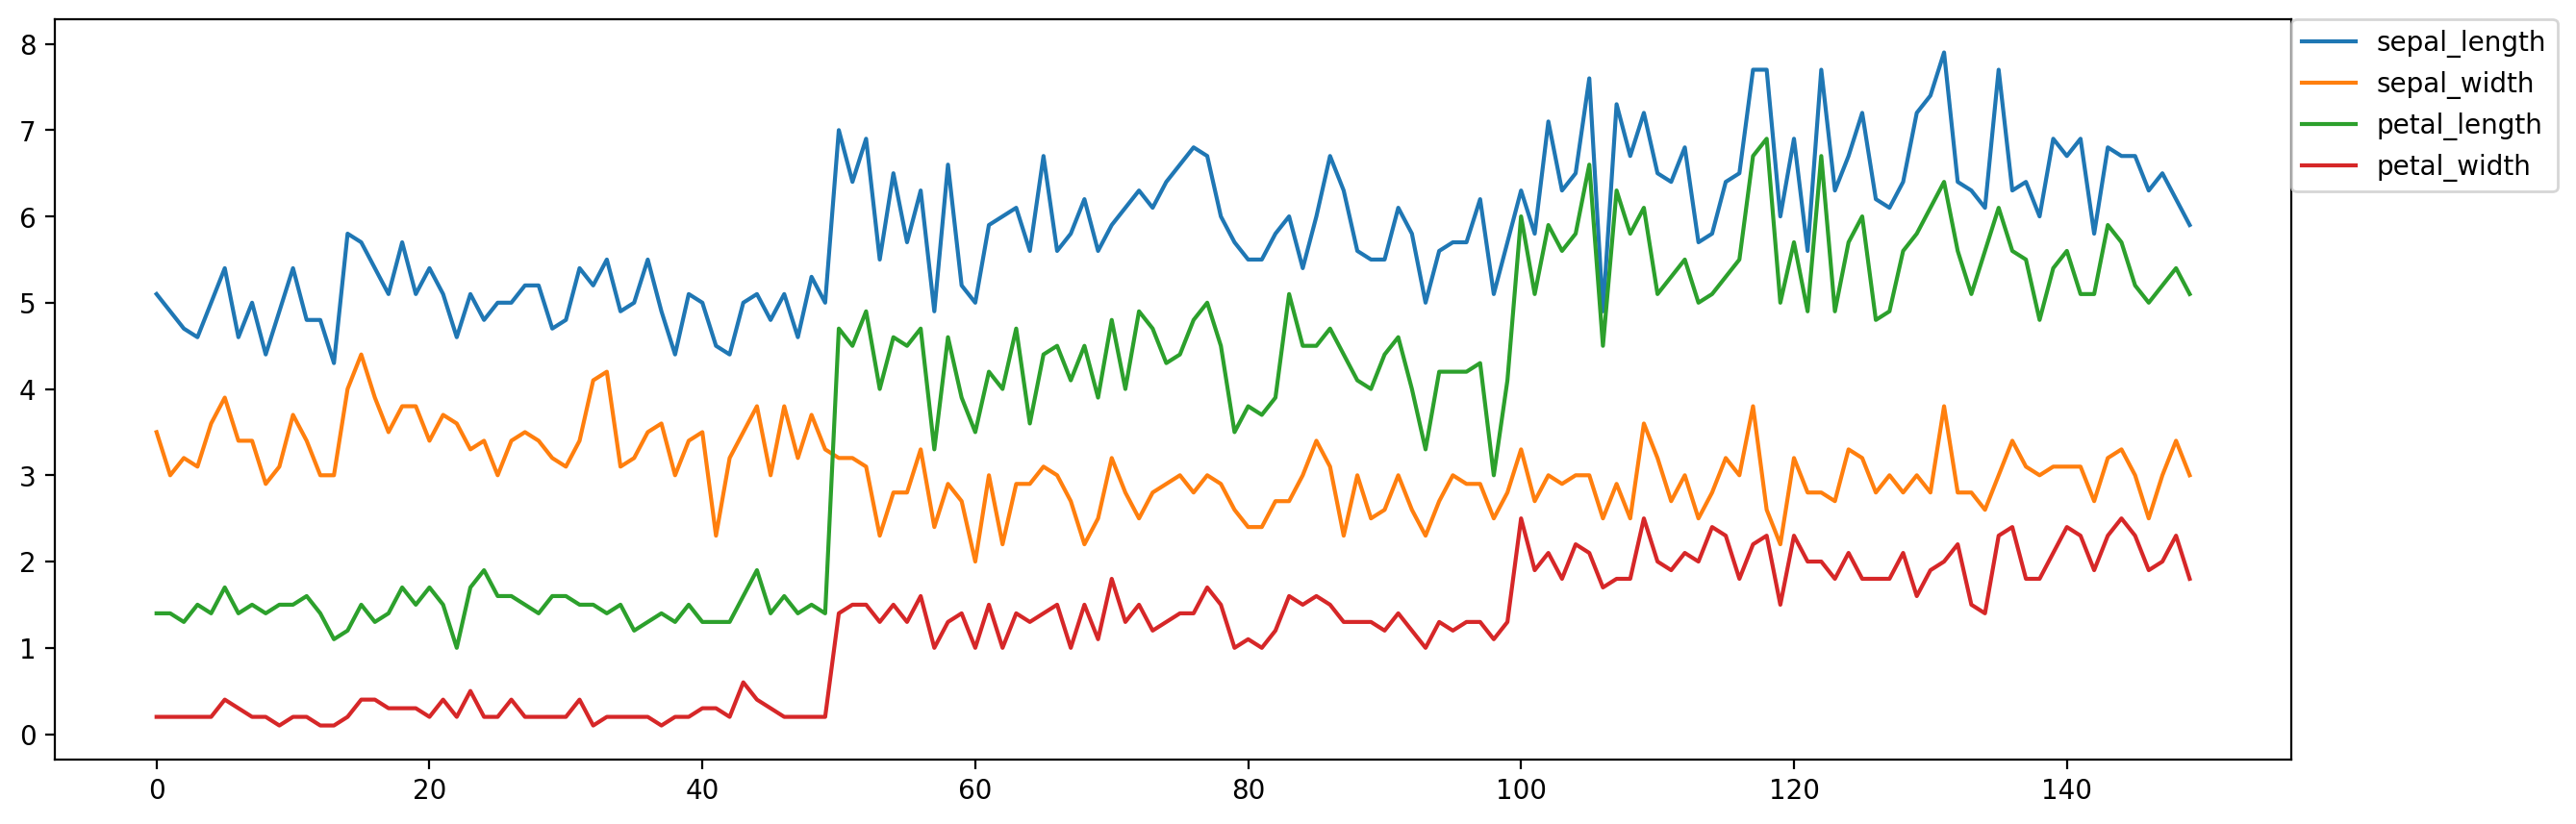

In [55]:
g = iris.plot(kind='line', figsize=(15,5))
# sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
# plt.savefig('data/ch12_iris.jpg')
plt.show()

In [56]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


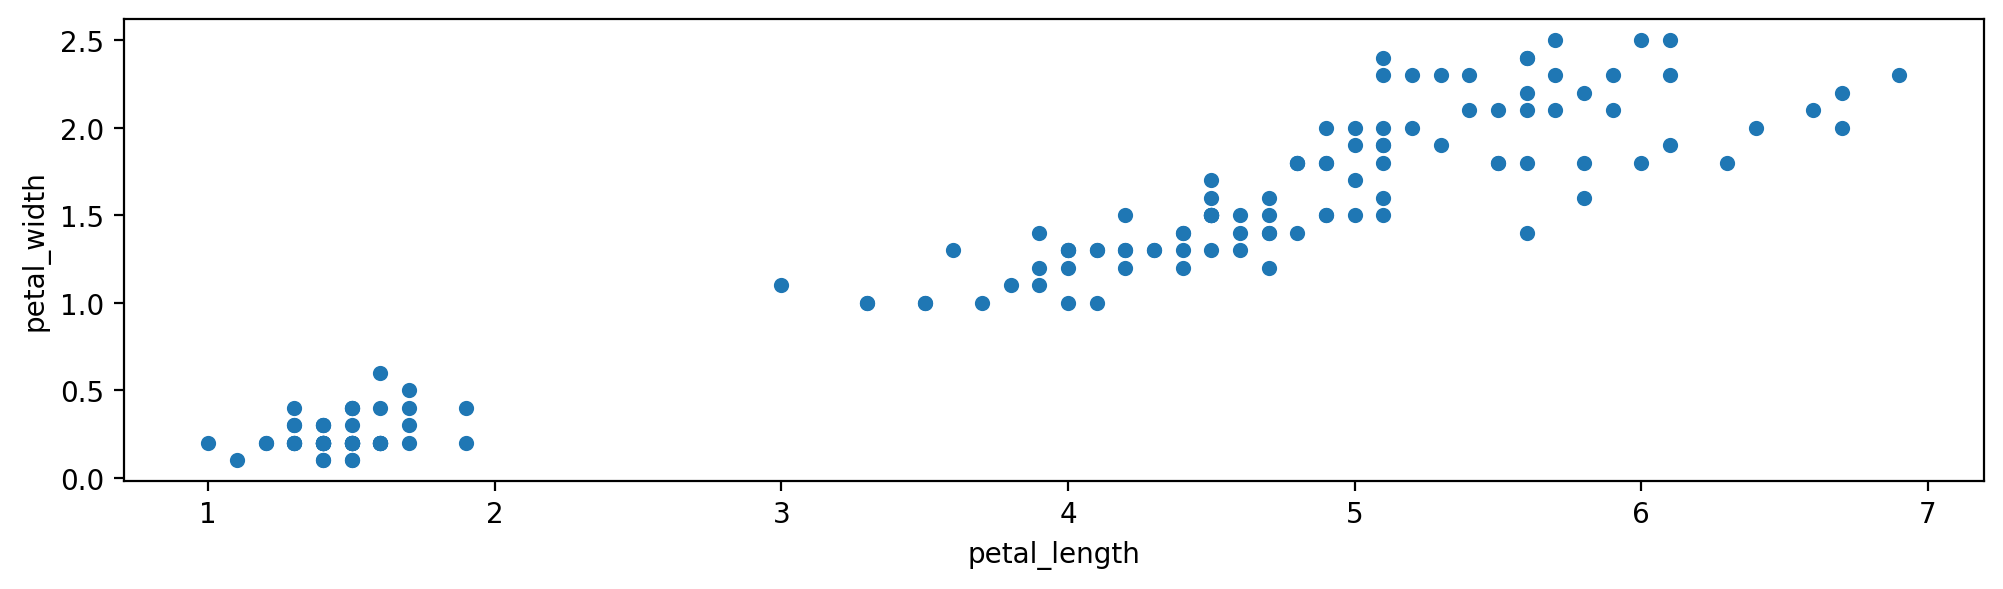

In [61]:
iris.plot(x='petal_length', y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

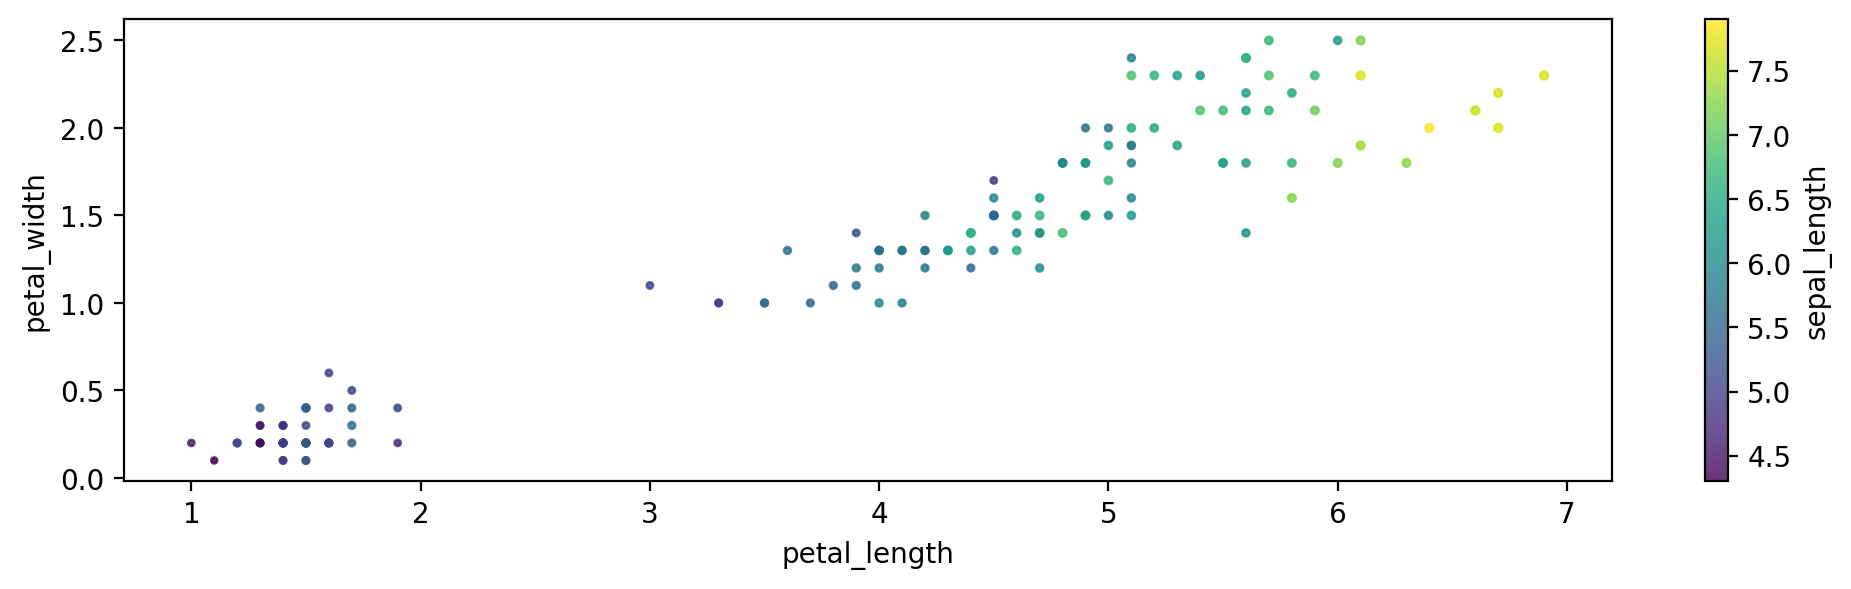

In [63]:
iris.plot(kind='scatter',
          x='petal_length',
          y='petal_width',
          figsize=(12,3),
          s='sepal_length', # size
          c='sepal_length', # color
          alpha = .8) # 0<투명도<=1
plt.show() 

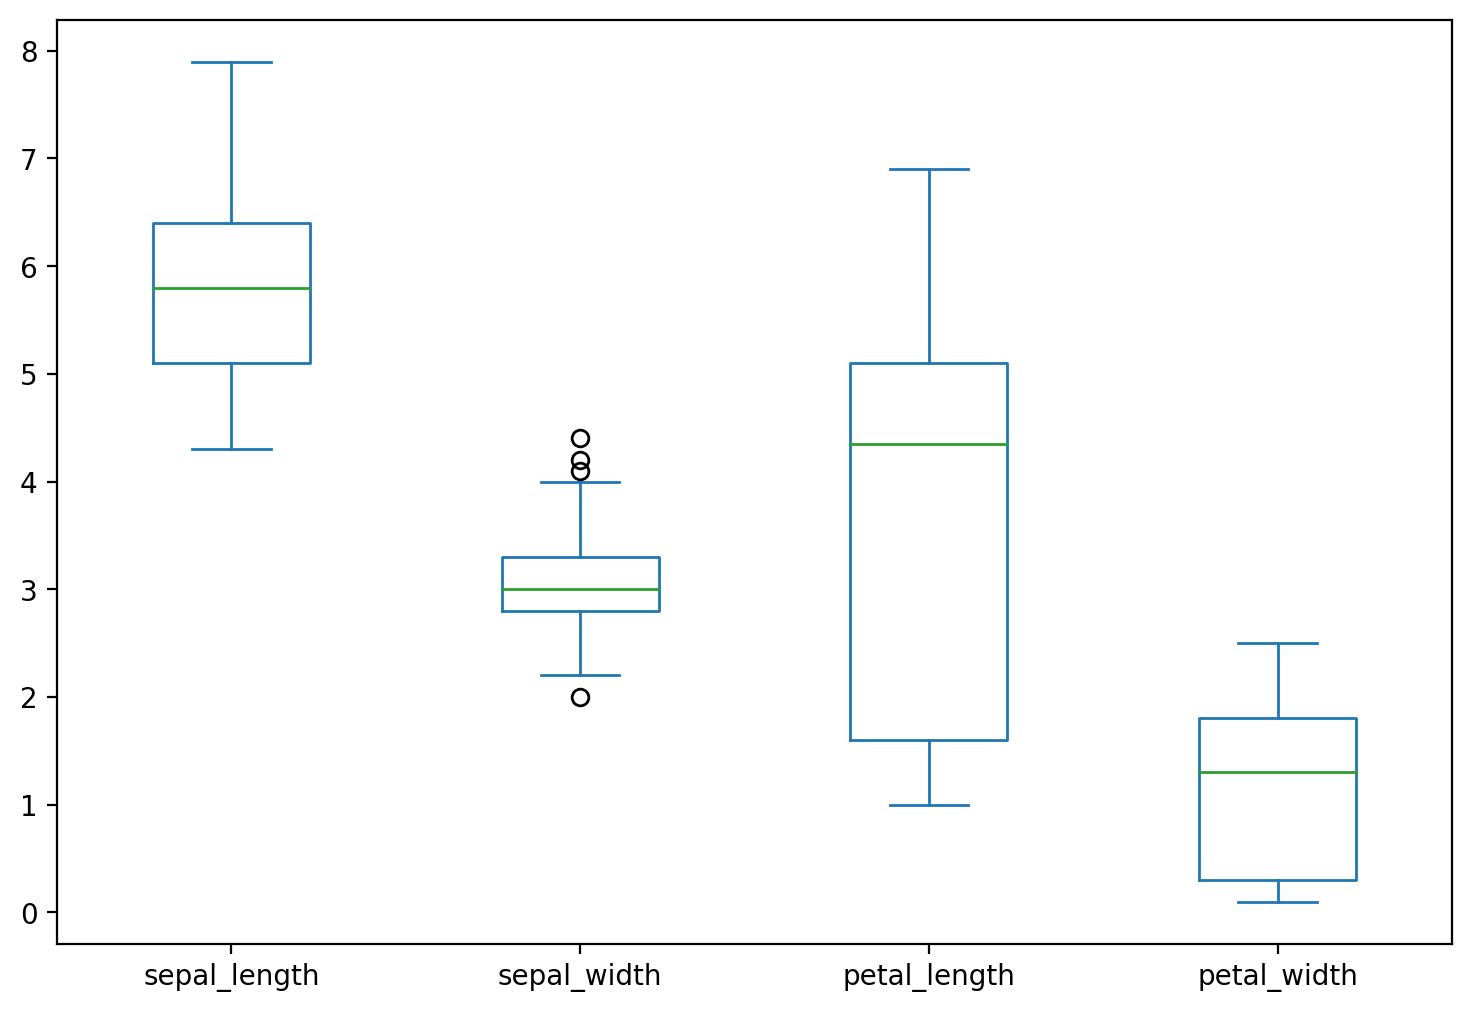

In [68]:
# 모든 열의 boxplot(이상치 여부, q1, q2, q3, min, max)
iris.plot(kind='box', figsize=(9,6))
plt.show()

## IQR(사분위수 범위)

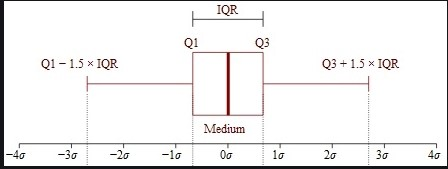

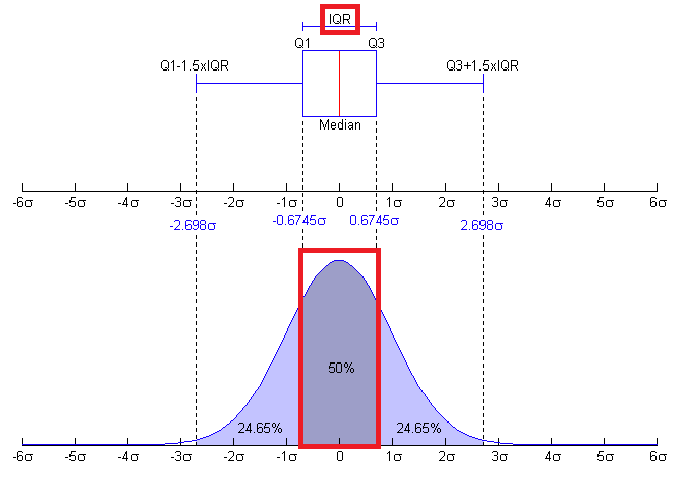

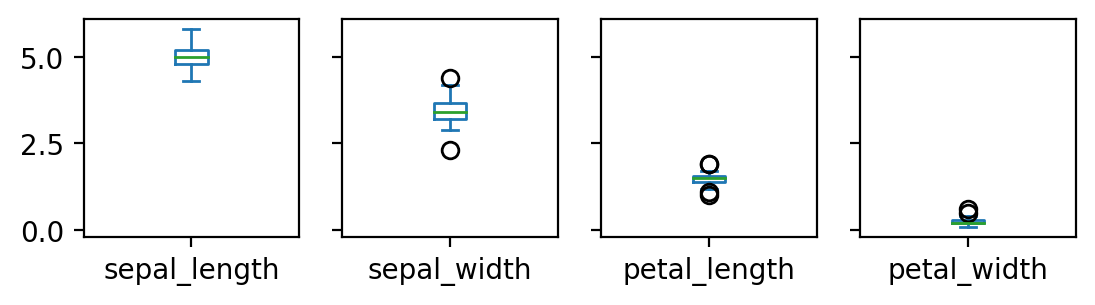

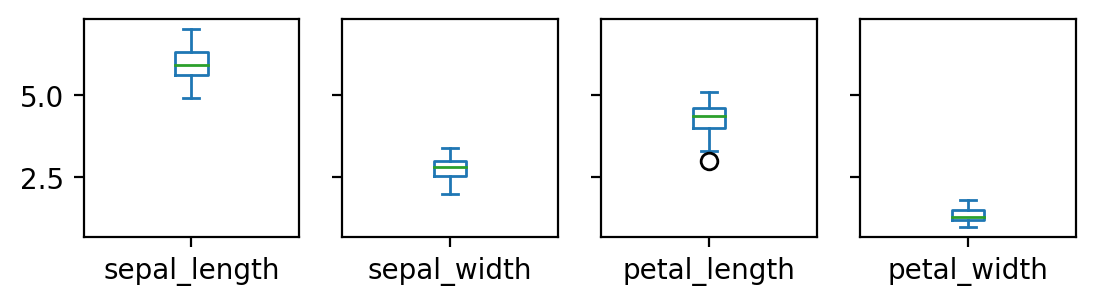

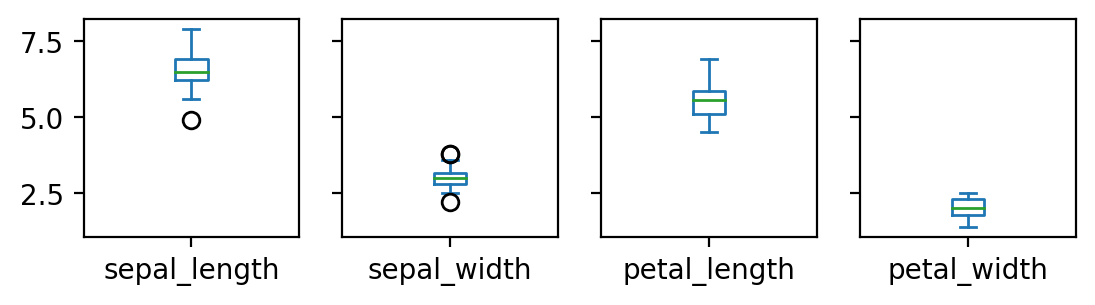

In [75]:
# 종별 boxplot
iris.groupby('species').plot(kind='box',
                             subplots=True,
                             layout=(3,4),
                             sharey=True) # x축공유
plt.show()

## 1.4 다양한 그래프 그리기
- pyplot 함수들 : (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
### 1) plt.scatter() : 산점도

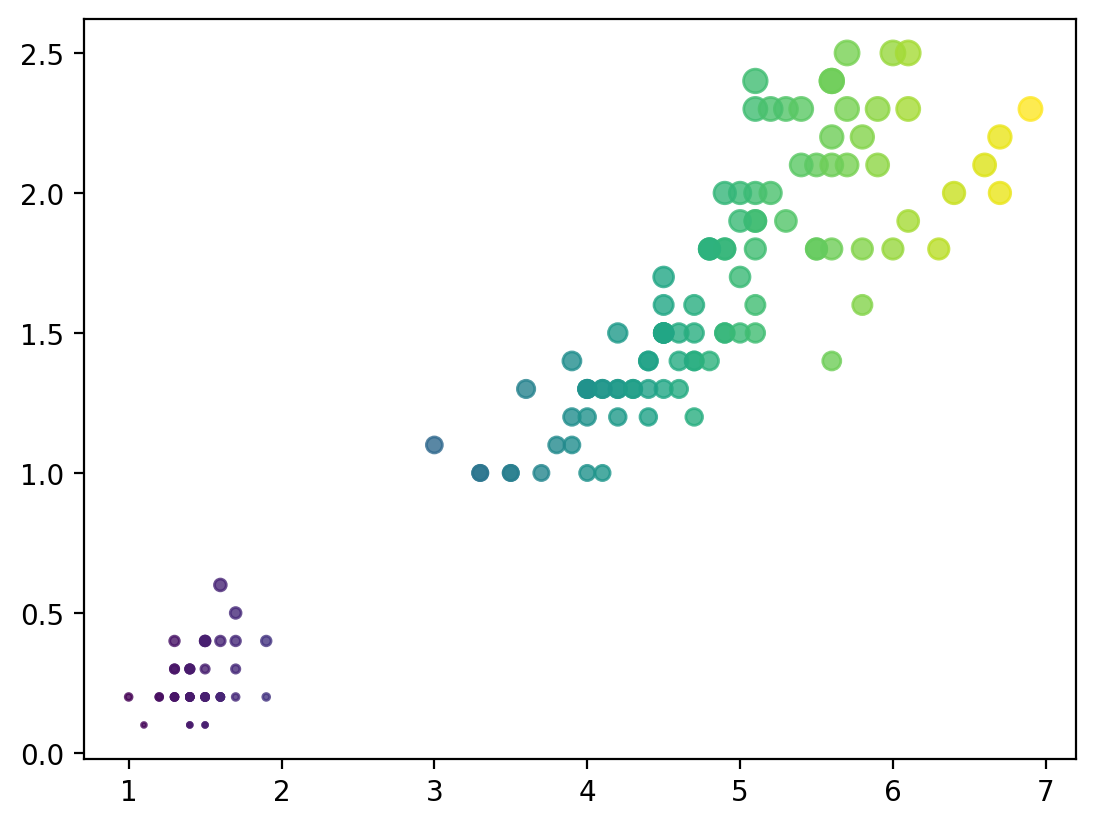

In [80]:
plt.scatter(iris.petal_length, iris.petal_width,
            s=iris.petal_width*30,
            c=iris.petal_length*20,
            alpha=.8)

### 2)boxplot(단점:분포를 몰라), violinplot()

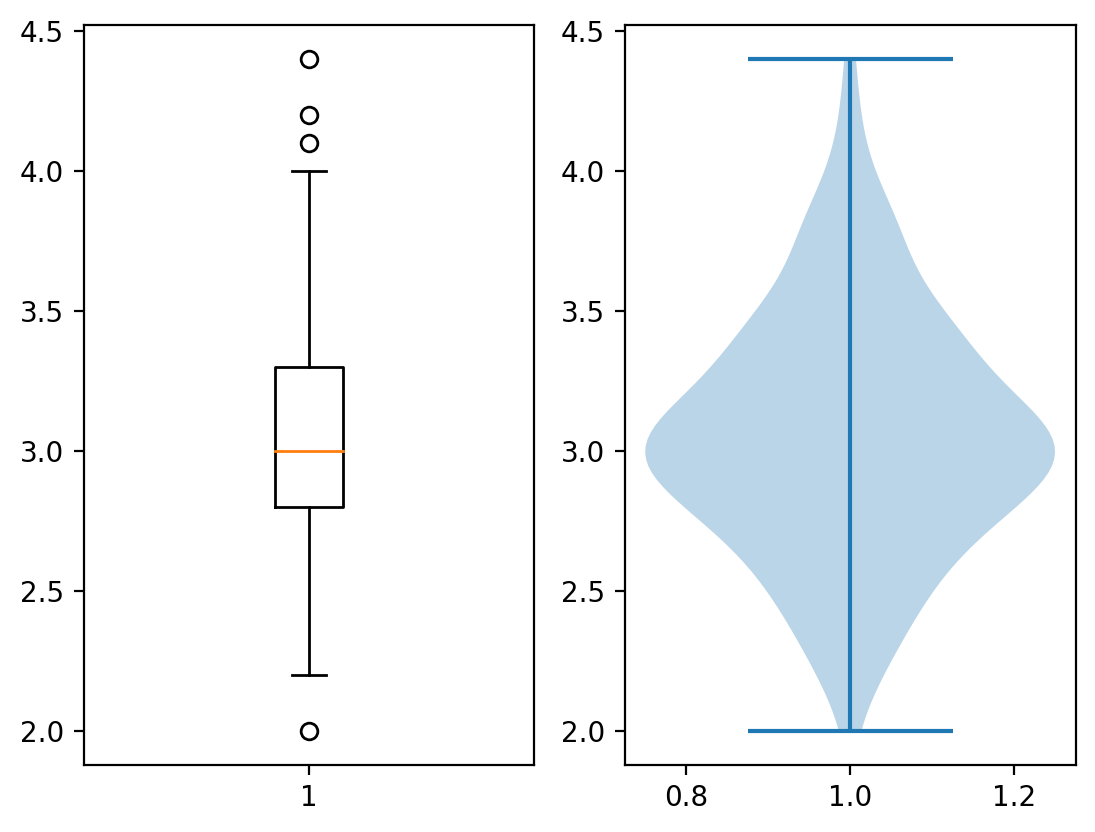

In [82]:
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[1].violinplot(iris.sepal_width)
plt.show()

### 3) bar(), barh(), axvline(수직선), axhline(수평선)

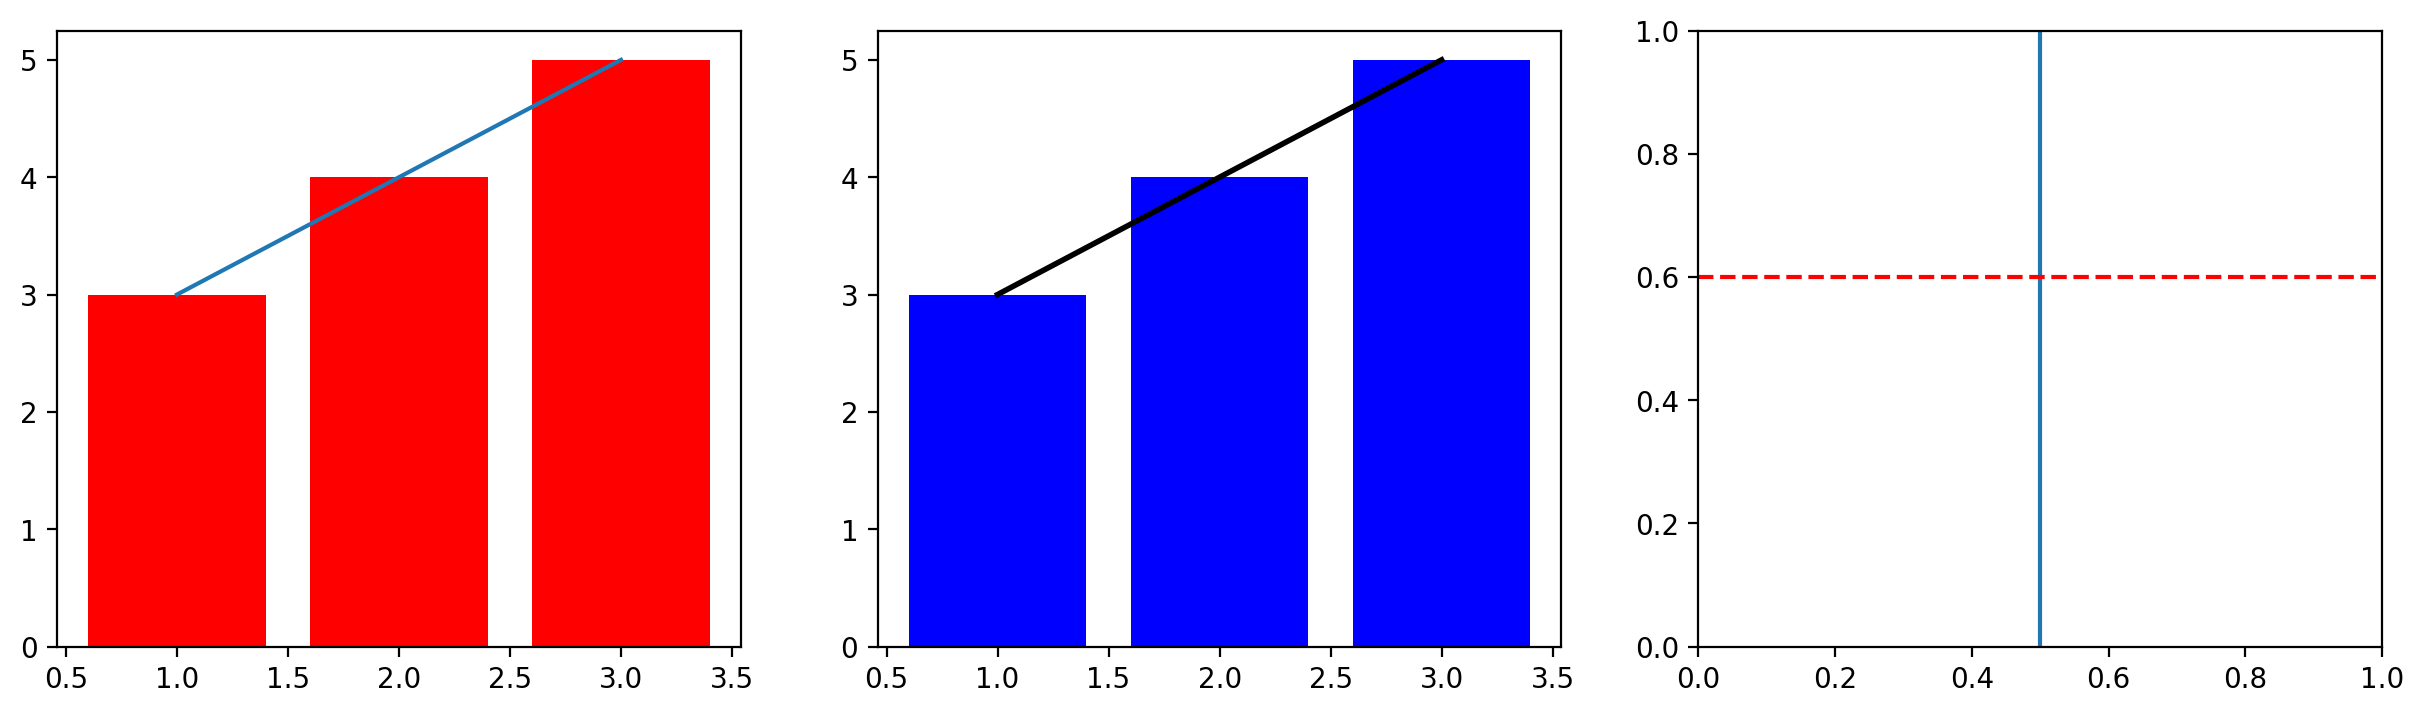

In [89]:
x = [1, 2, 3]
y = [3, 4, 5]
fig,axes = plt.subplots(ncols=3, figsize=(15,4))
axes[0].bar(x,y,color='r')
axes[0].plot(x,y)
axes[1].bar(x,y,color='b')
axes[1].plot(x,y, 'k', linewidth=2) # k:black
axes[2].axvline(0.5)
axes[2].axhline(0.6, c='r', linestyle='--')

### 4) hist(도수분포표;histogram)

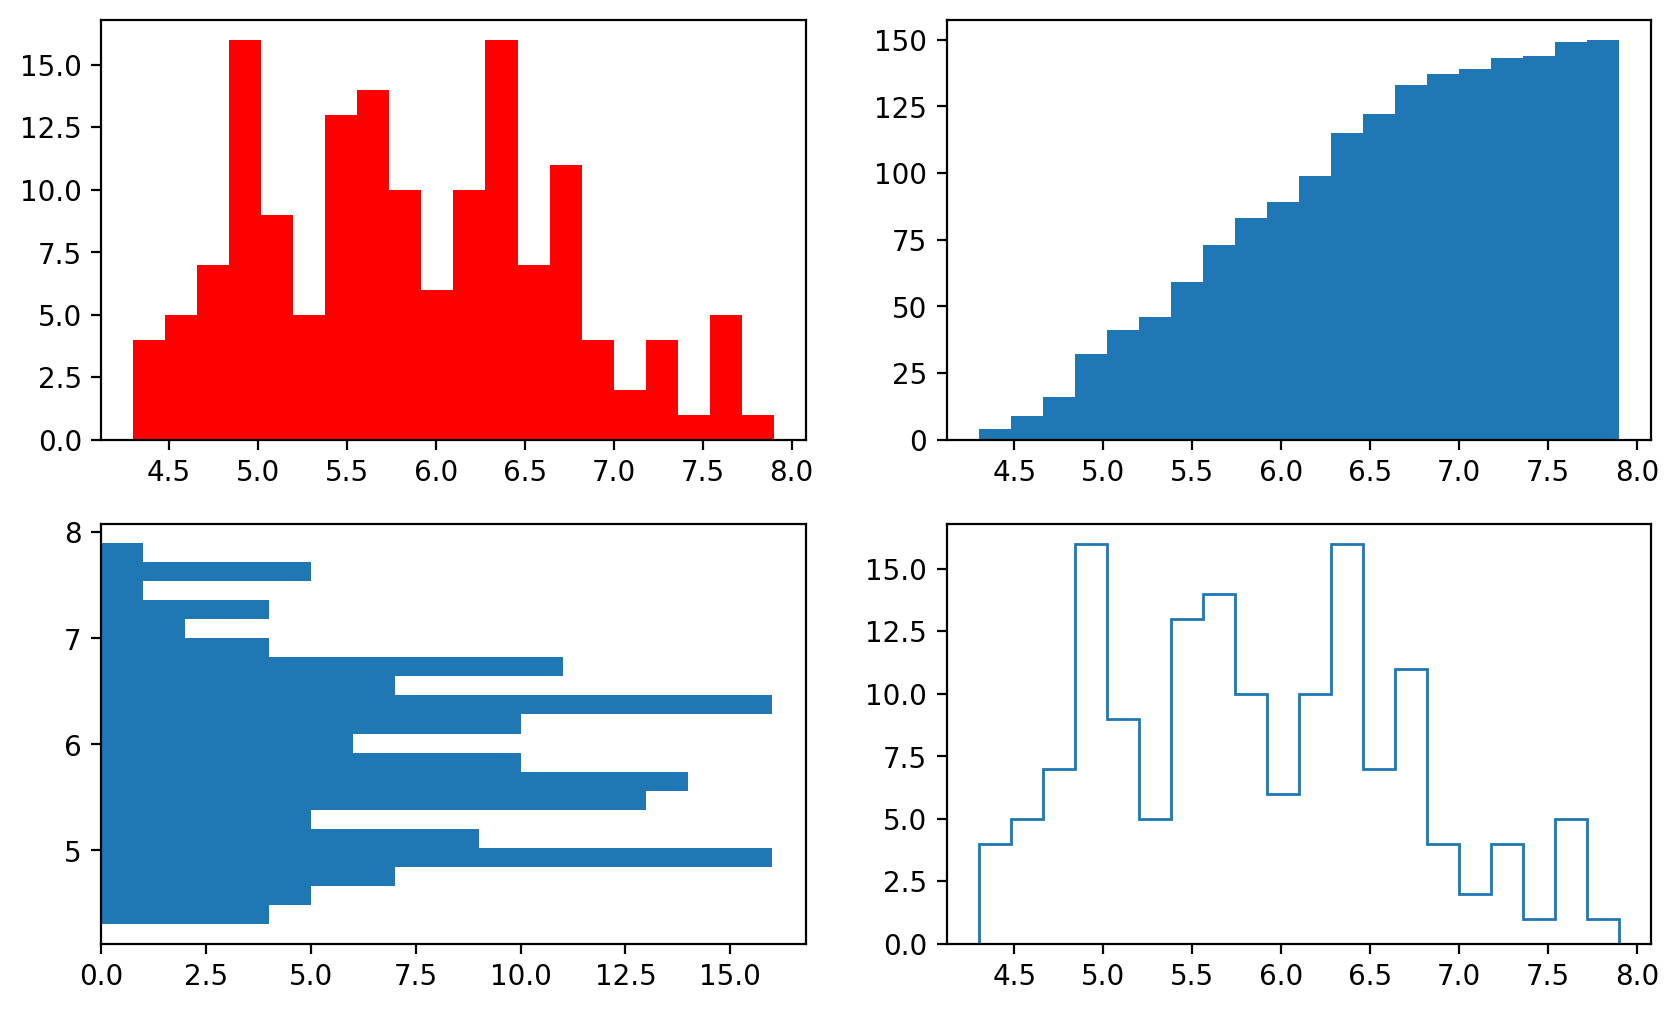

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='r') # 히스토그램(도수분포표)
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) # 누적히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal') # 수평히스토그램
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step')
plt.show()


## 1.5 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker... (plot의 매개변수로 지정)
### 2) text(), annotate()
- https://matplotlib.org/api/axes_api.html#text-and-annotations (교안29page)

In [24]:
# 개별 폰트 설정을 위한 방법
from matplotlib.font_manager import FontProperties
font_path = 'fonts/SongMyung-Regular.ttf' # 폰트파일(네이버폰트, 구글폰트 등에서 다운로드)
font_prop = FontProperties(fname=font_path, size=30)

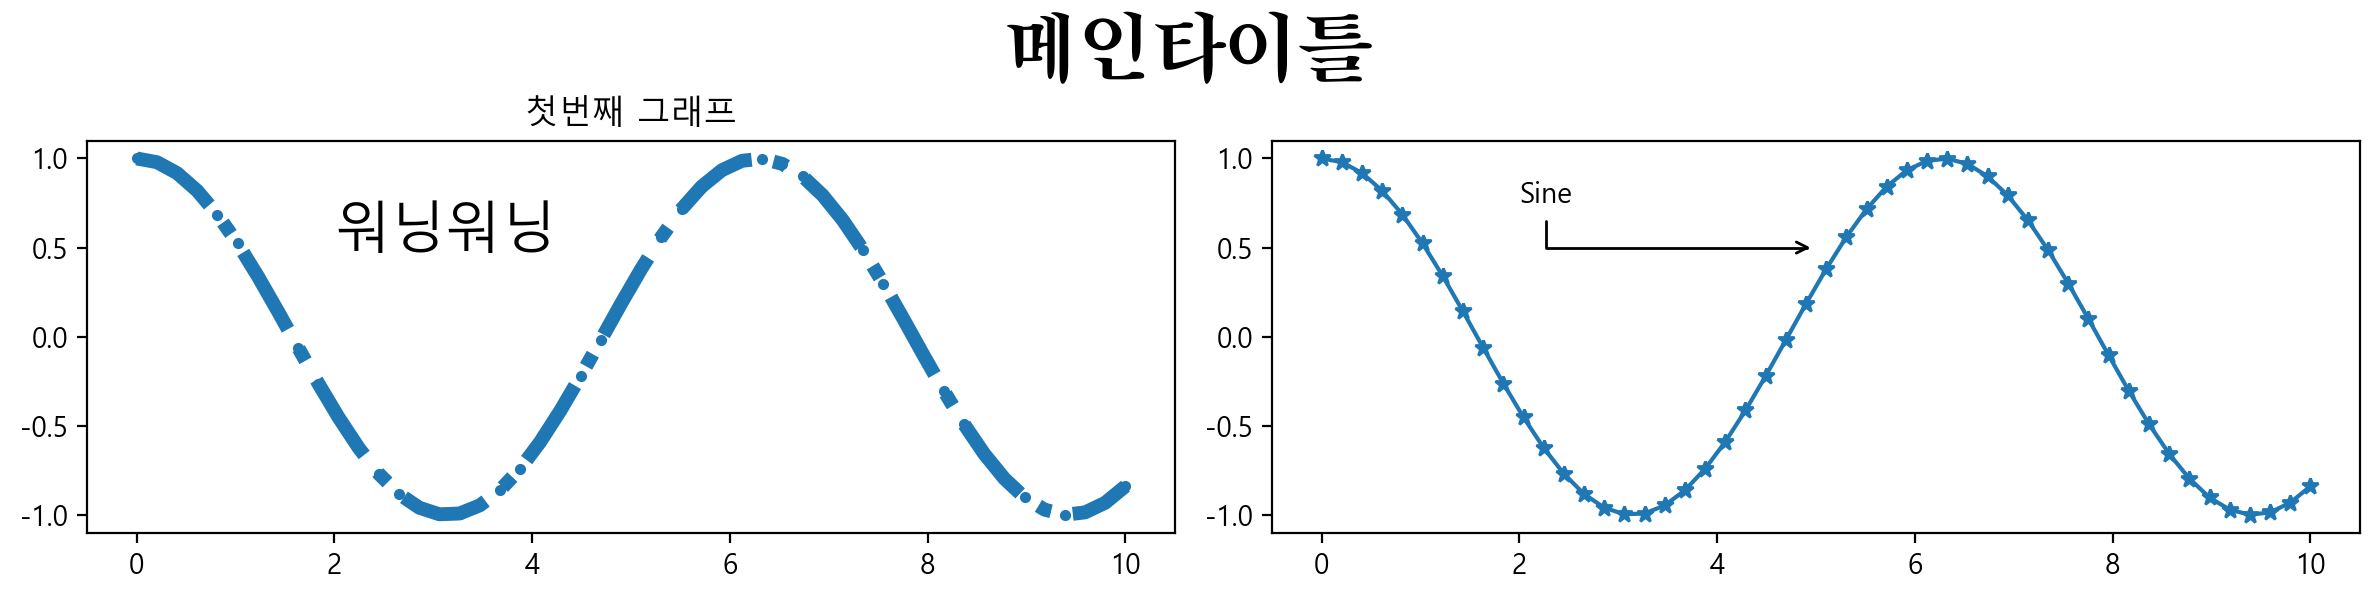

In [ ]:
x = np.linspace(0,10) # num = 50
y = np.cos(x)
fig,axes = plt.subplots(1, 2, figsize=(12,3))
axes[0].plot(x,y,marker='.', linewidth=5, linestyle='-.')
axes[0].text(2,0.5, '워닝워닝', fontsize=20)
axes[0].set_title('첫번째 그래프')
axes[1].plot(x,y,marker='*')
plt.annotate('Sine', xytext=(2, 0.75), # 글자가 생성되는 좌표 위치(좌하)
             xy=(5, 0.5), # 화살표가 가리킬 좌표 위치
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='angle') # angle(꺾은선), arc(직선), ...
            )
plt.tight_layout(rect=[0, 0, 1, 0.9]) # left(0), bottom(0), right(1), top(1)
plt.suptitle('메인타이틀', fontproperties=font_prop)
plt.show()

### 3) 수학기호
- https://matplotlib.org/users/mathtext.html


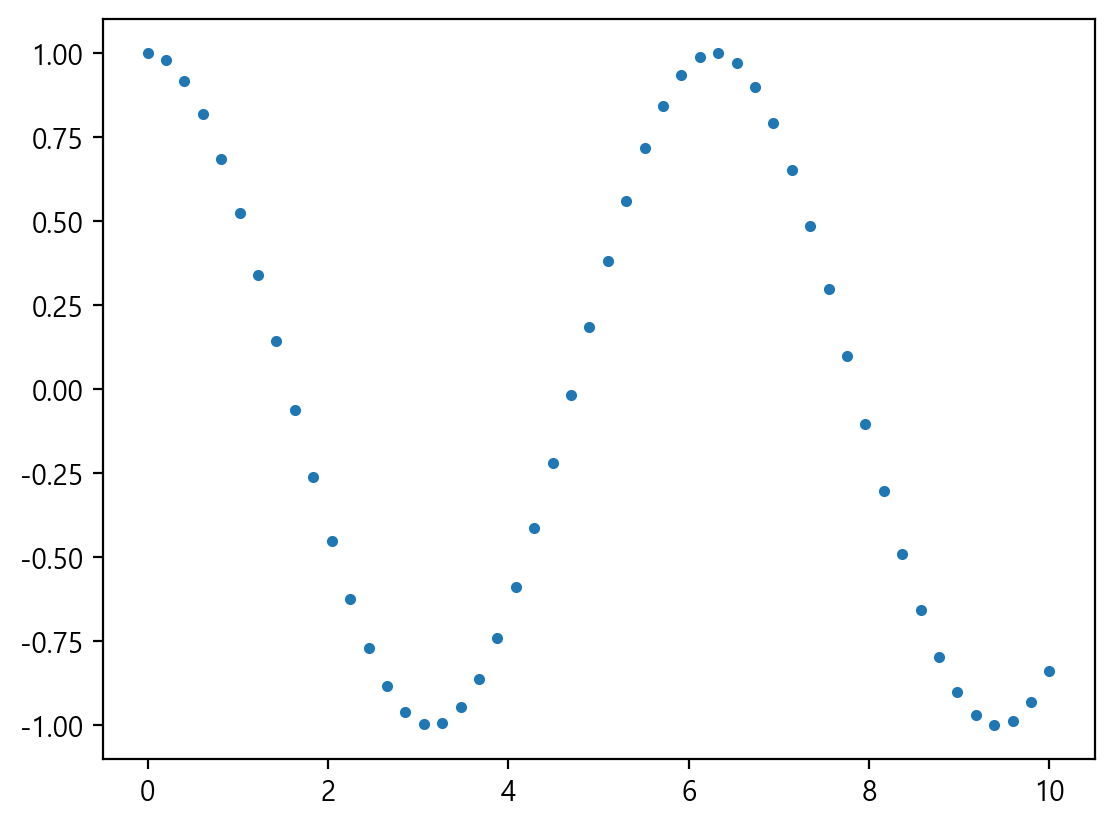

In [30]:
plt.scatter(x,y,marker='.')

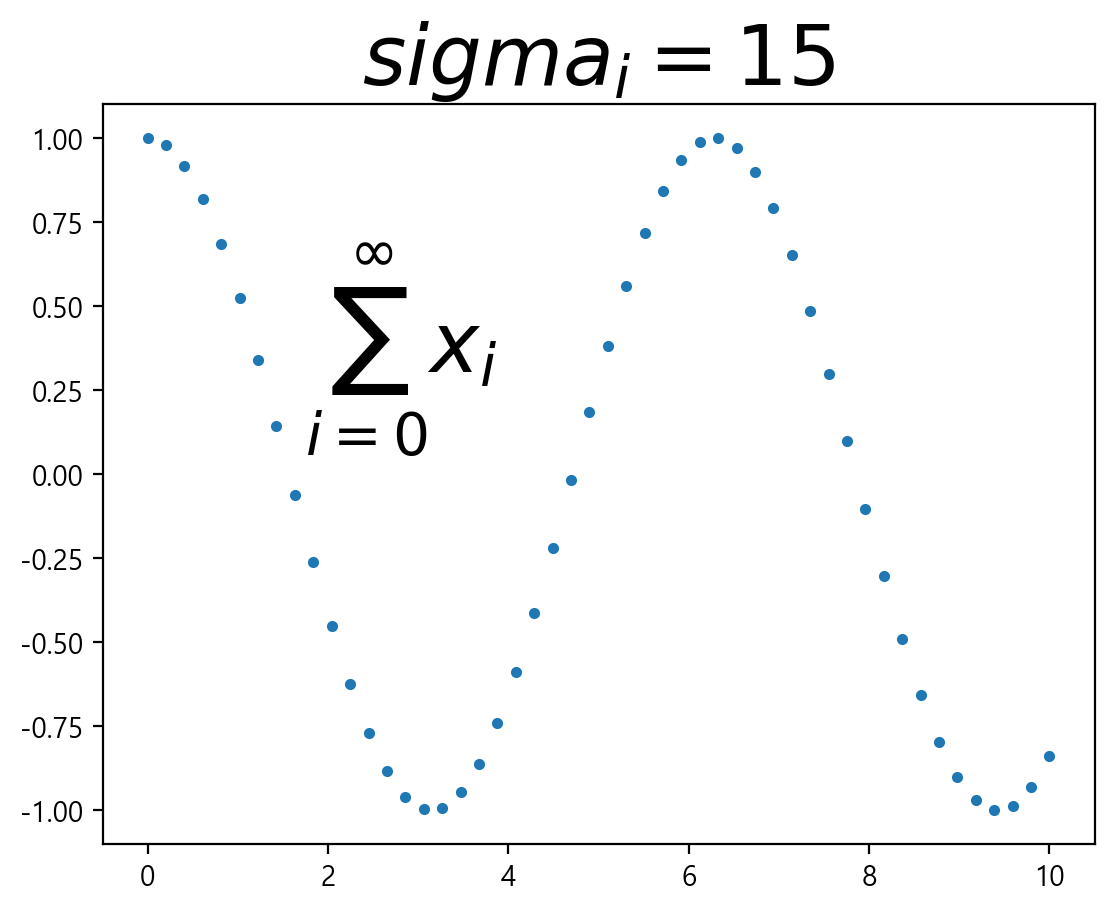

In [37]:
plt.scatter(x,y, marker='.')

plt.title(r'$sigma_i =15$', fontsize = 30)
plt.text(1.75, 0.3, r'$\sum_{i=0}^\infty x_i$', fontsize=30)
plt.show()

### 4) 축과 눈금
- https://matplotlib.org/3.1.0/api/axis_api.html (33p.)


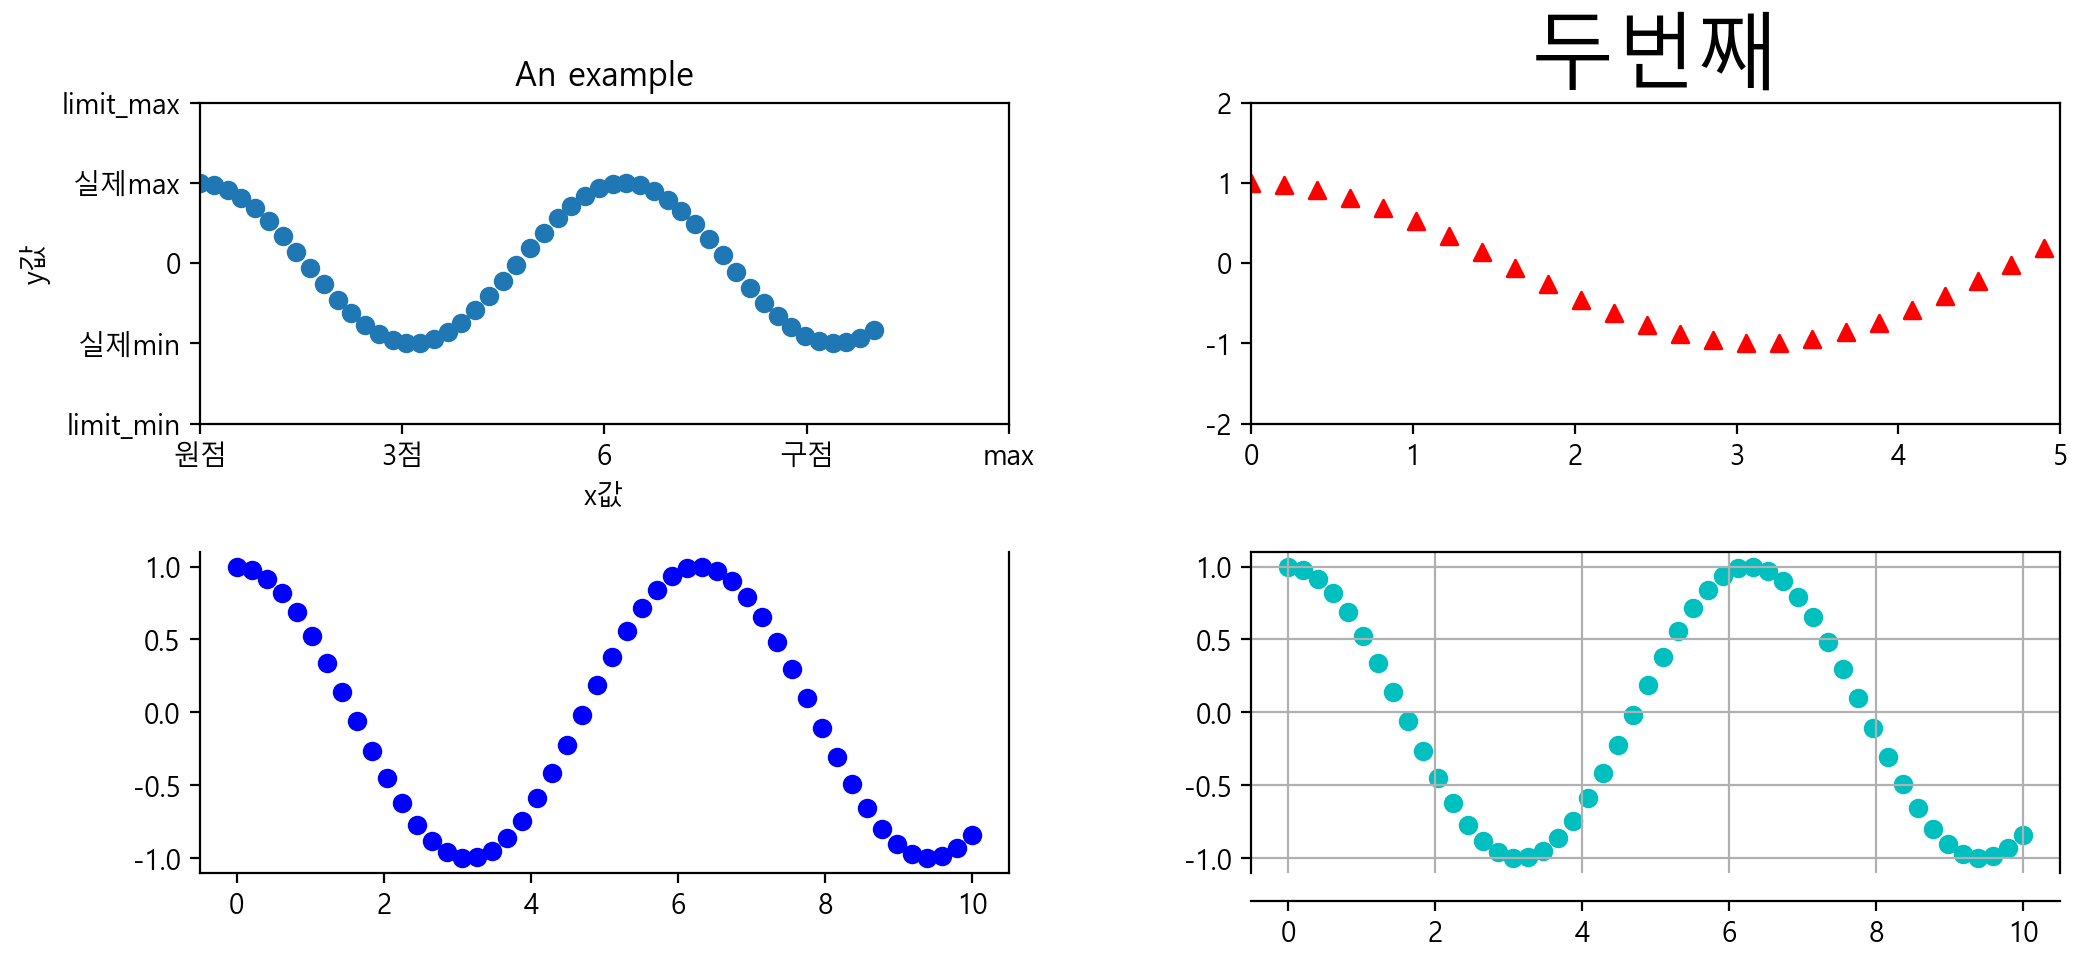

In [59]:
x = np.linspace(0,10) # 0,10까지 50개 값을 배열로 생성
y = np.cos(x)
fig, axes = plt.subplots(2, 2, figsize=(12,5))
# 서브 플롯끼리 여백 조정(hspace 위아래 여백, wspace 좌우 여백)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

axes[0,0].scatter(x,y)
axes[0,0].set(title='An example', ylabel='y값', xlabel='x값',
              xlim=[0,12], # x축 눈금의 범위
              ylim=[-2,2], # y축 눈금의 범위
              xticks=[0, 3, 6, 9, 12], # x축 눈금
              xticklabels = ['원점', '3점', 6, '구점', 'max'], # x축 눈금 라벨
              yticks = [-2,-1,0,1,2], # y축 눈금 라벨
              yticklabels = ['limit_min', '실제min', 0, '실제max', 'limit_max'])

axes[0,1].scatter(x,y, c='r', marker='^')
axes[0,1].set_title('두번째', fontsize=30)
axes[0,1].set_xlim(0,5) #set(xlim=[0,5])
axes[0,1].set_ylim(-2,2)

axes[1,0].scatter(x,y, c='b')
axes[1,0].spines['top'].set_visible(False)

axes[1,1].scatter(x,y, c='c')
axes[1,1].spines['bottom'].set_position( ('outward', 10) )
axes[1,1].grid(True)
plt.show()

### 5) 축 공유

In [ ]:
x = np.arange(0, 10)
y1 = 0.5* x**2
y2 = -1 *y1


[ 0.   0.5  2.   4.5  8.  12.5 18.  24.5 32.  40.5]


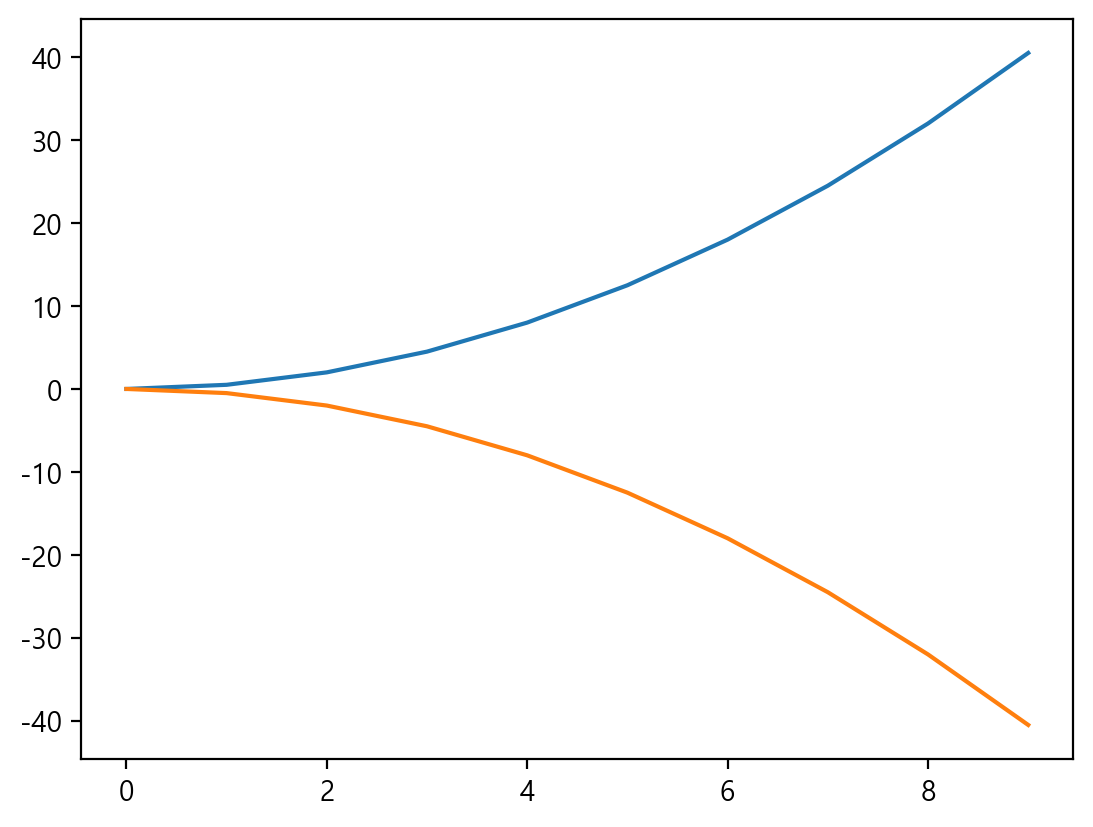

In [65]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()


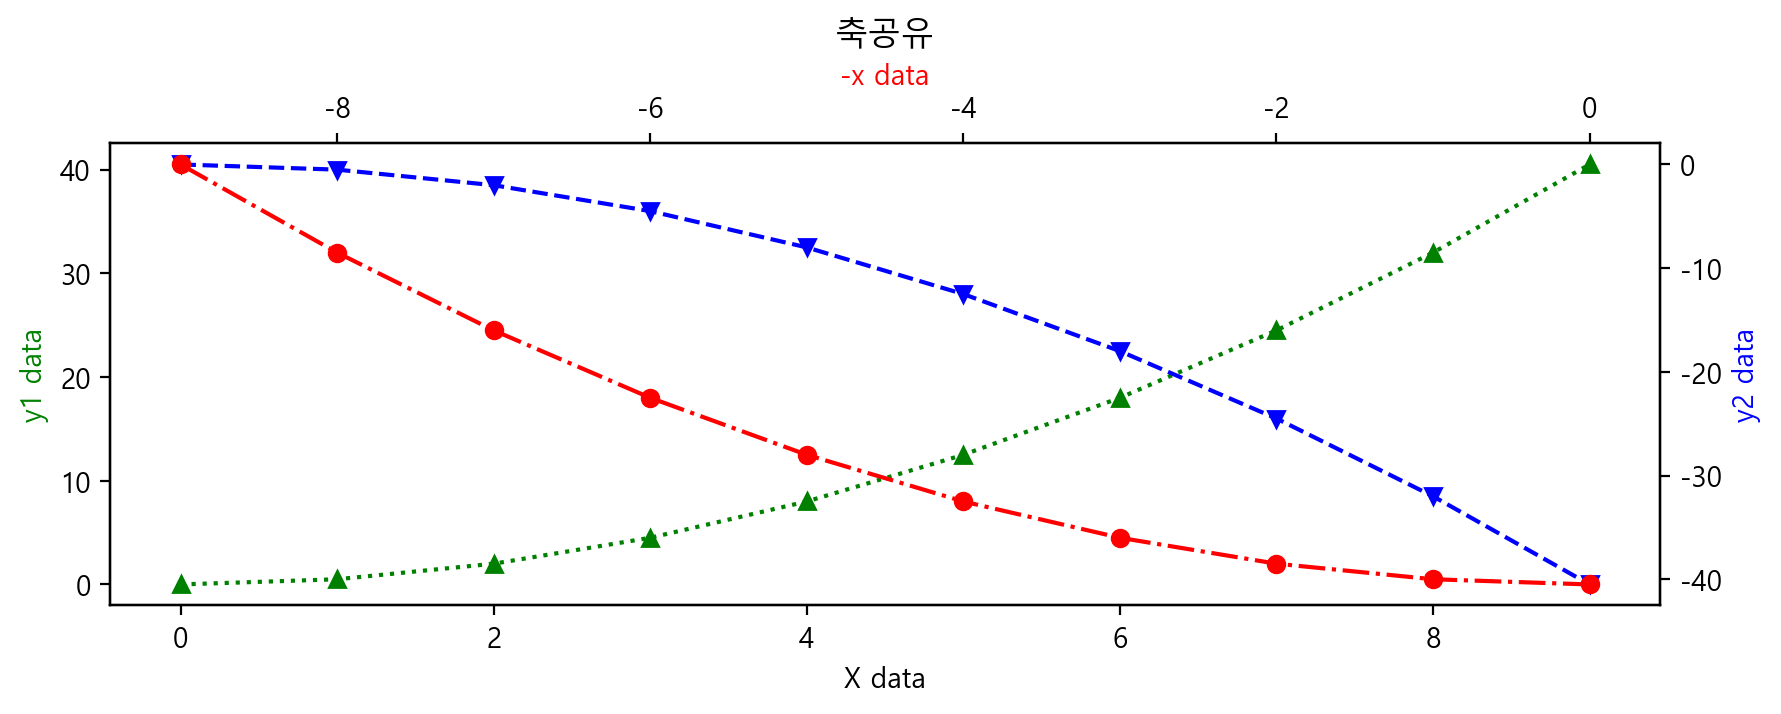

In [78]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x, y1, 'g^:')
ax1.set(title='축공유', xlabel='X data')
ax1.set_ylabel('y1 data', color='g')

ax2 = ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x,y2, 'bv--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'ro-.')
ax3.set_xlabel('-x data', color='r')

plt.show()

### 6) 범례표시
- 범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
### 7) 플롯 스타일 지정

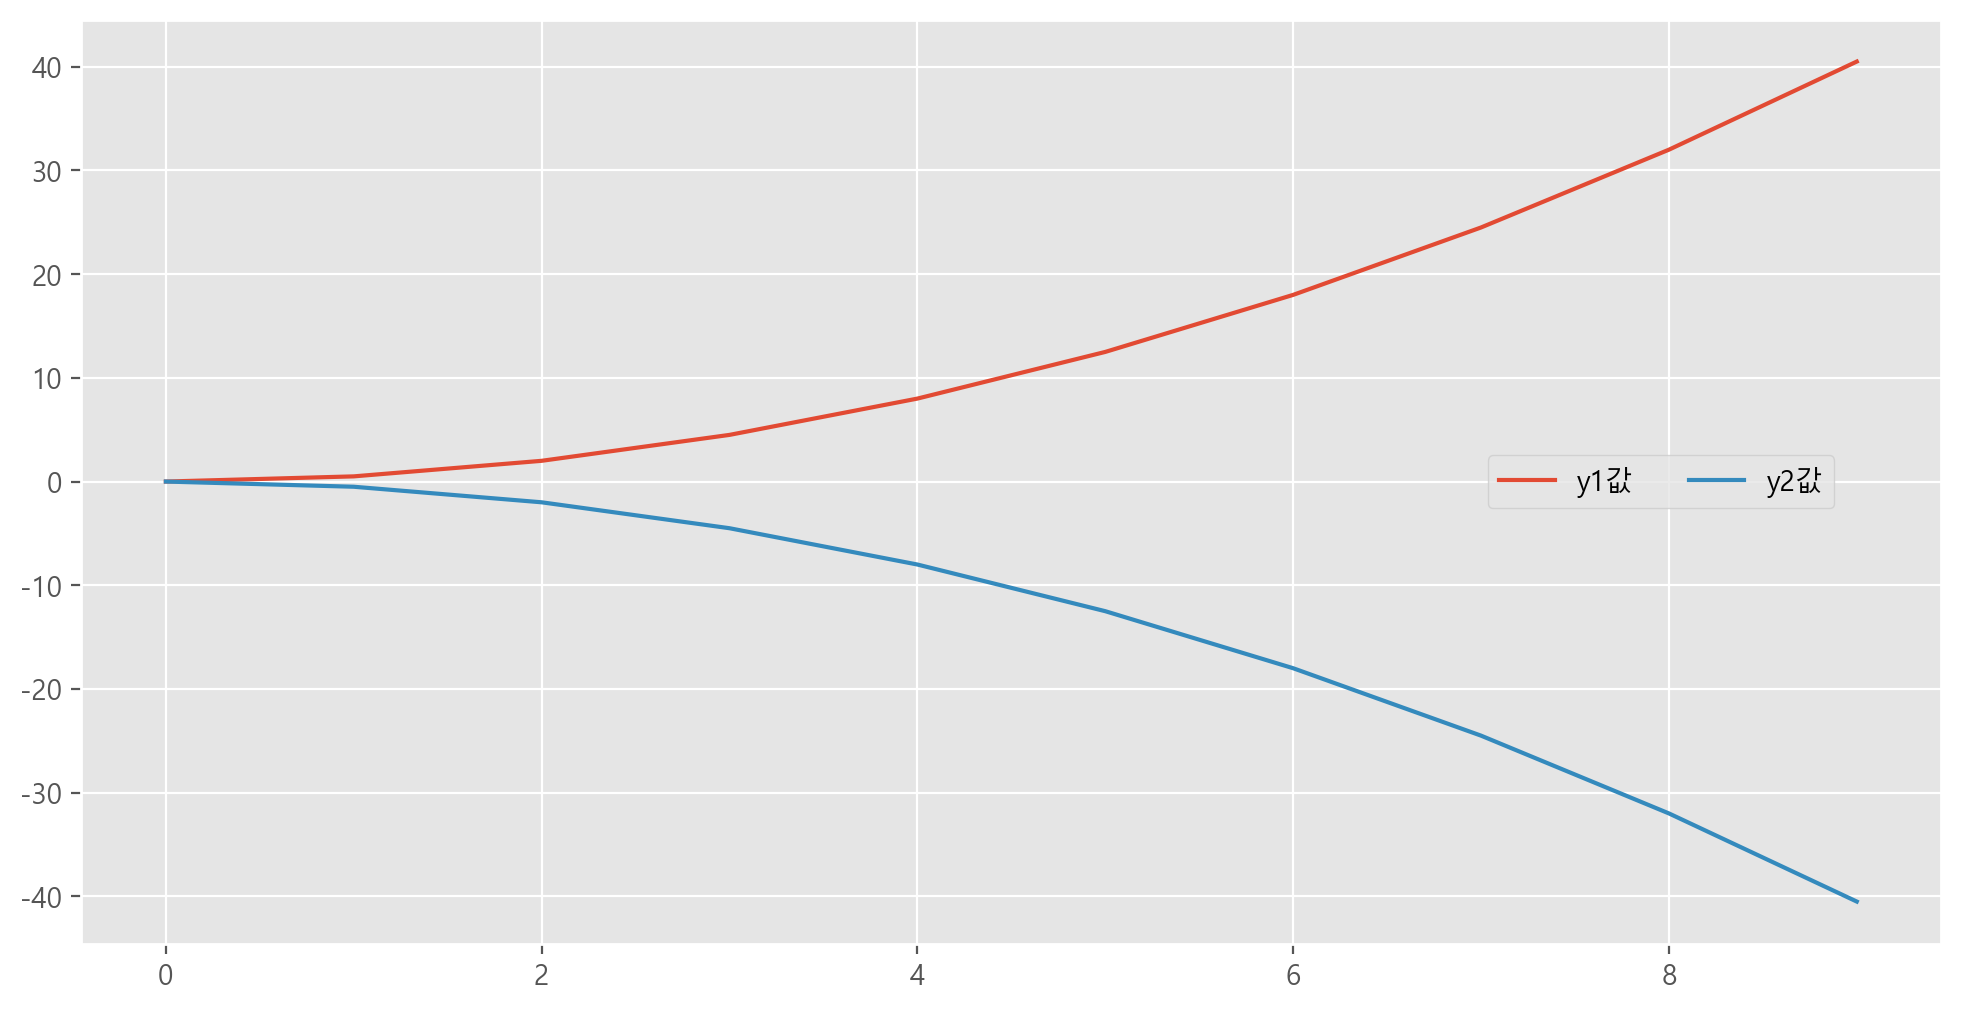

In [89]:
plt.style.use('ggplot') # 스타일 지정하는 함수를 쓰면 모든 설정 초기화
plt.figure(figsize=(12,6))
plt.plot(x,y1, label='y1값')
plt.plot(x,y2, label='y2값')
plt.legend(loc='center right', ncol=2, bbox_to_anchor=(0.95,0.5))
plt.show()
